In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [350]:
df=pd.read_excel("a1_Dataset_10Percent.xlsx")
pd.set_option('display.max_columns', None)

In [351]:
df

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,8415498,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,12107603,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,14400995,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,28724674,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...
22218,52830893,13.0,49.0,B,M,South East,London,Silver,500.00,9.0,0
22219,52834058,13.0,65.0,B,F,South East,London,Silver,1500.00,5.0,0
22220,52834376,15.0,73.0,D,U,South East,S & S East,Gold,6053.06,12.0,0
22221,52837057,9.0,70.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0


In [352]:
#descriptive statistics
round(df.describe())

,ID,DemAffl,DemAge,LoyalSpend,LoyalTime,TargetBuy
count,22223.0,21138.0,20715.0,22223.0,21942.0,22223.0
mean,26055403.0,9.0,54.0,4421.0,7.0,0.0
std,15074974.0,3.0,13.0,7559.0,5.0,0.0
min,140.0,0.0,18.0,0.0,0.0,0.0
25%,11694023.0,6.0,44.0,0.0,4.0,0.0
50%,28748786.0,8.0,54.0,2000.0,5.0,0.0
75%,37454020.0,11.0,64.0,6000.0,8.0,0.0
max,52856469.0,34.0,79.0,296314.0,39.0,1.0


In [353]:
#For object column
df.describe(include="O")

,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass
count,21549,19711,21758,21758,22223
unique,7,3,5,13,4
top,C,F,South East,London,Silver
freq,4566,12149,8634,6189,8572


So we can say that
#1) Maximum Leads are female
#2) Around 1/3 rd of the leads hold Silver Loyalty class


In [354]:
#Univariate Analysis for numerical columns


DemAffl


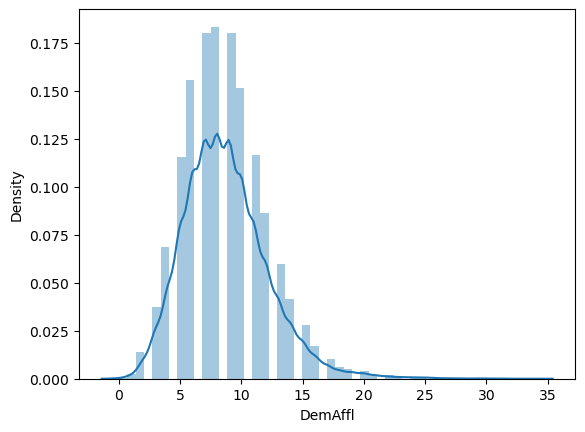

DemAge


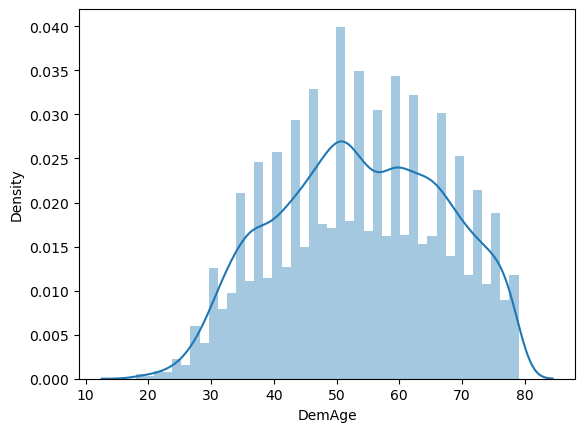

LoyalSpend


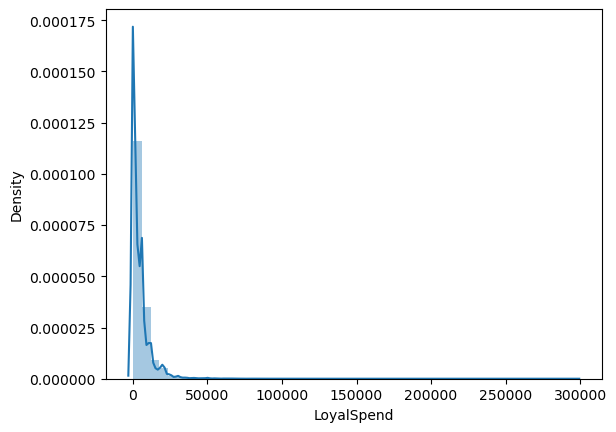

LoyalTime


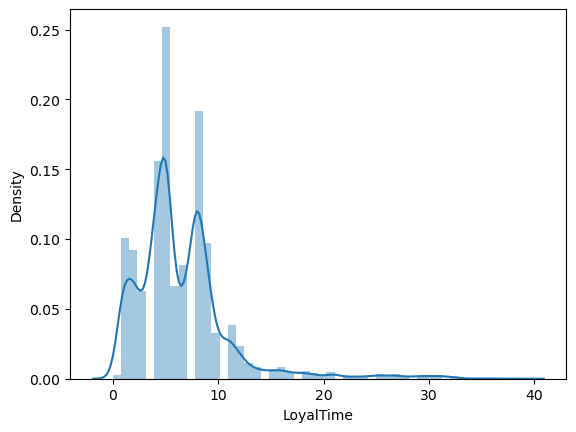

In [355]:
df_n=df.select_dtypes(include="float")

for i in df_n.columns:
    print(f"{i}")
    sns.distplot(df_n[i])
    plt.show()
        


In [356]:
df_n.skew()

DemAffl       0.891684
DemAge       -0.079830
LoyalSpend    8.037186
LoyalTime     2.282790
dtype: float64

**we can say that
1)DemAffl= Moderately Positive skewed
2)DemAge=slight negatively skewed or close to normality
3)LoyalSpend=highly positively skewed
4)Loyal Time=highly positively skewed

In [357]:
# univariate analysis for object column

In [358]:
df_o=df.select_dtypes("object")

Column Name: DemClusterGroup


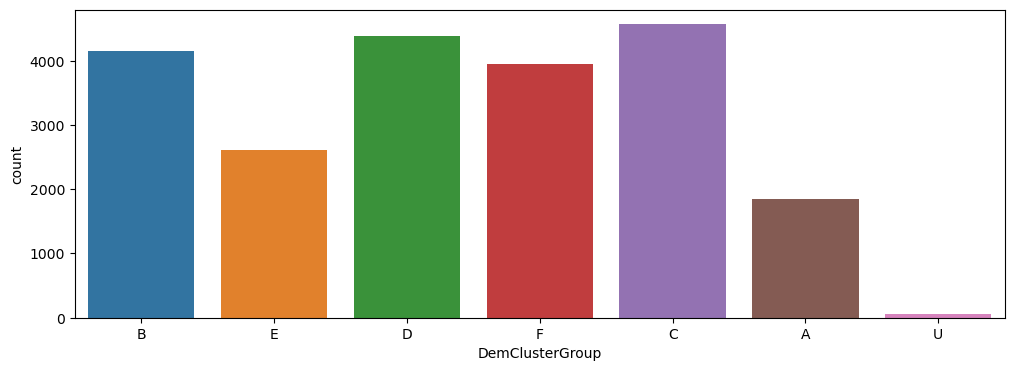

Column Name: DemGender


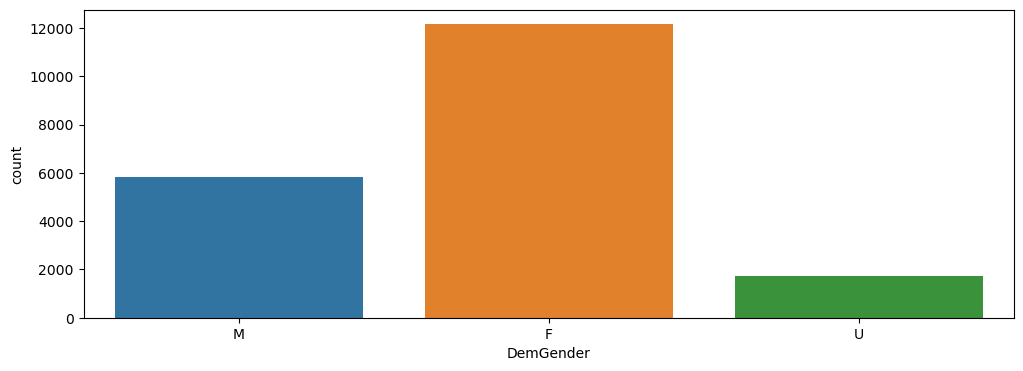

Column Name: DemReg


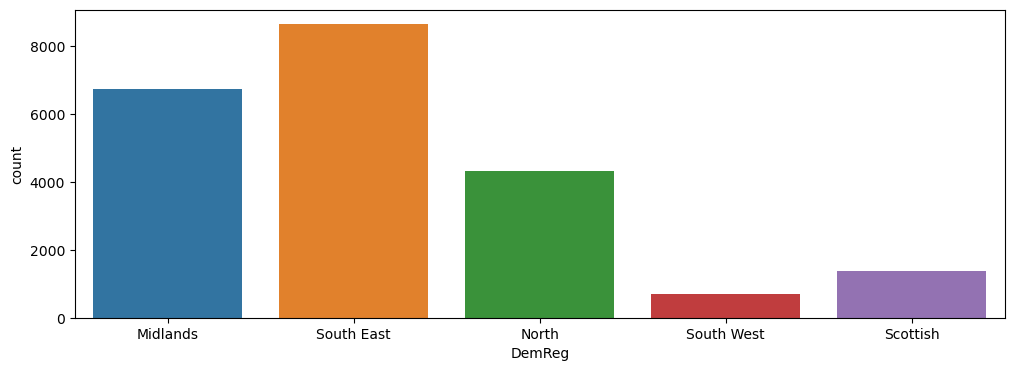

Column Name: DemTVReg


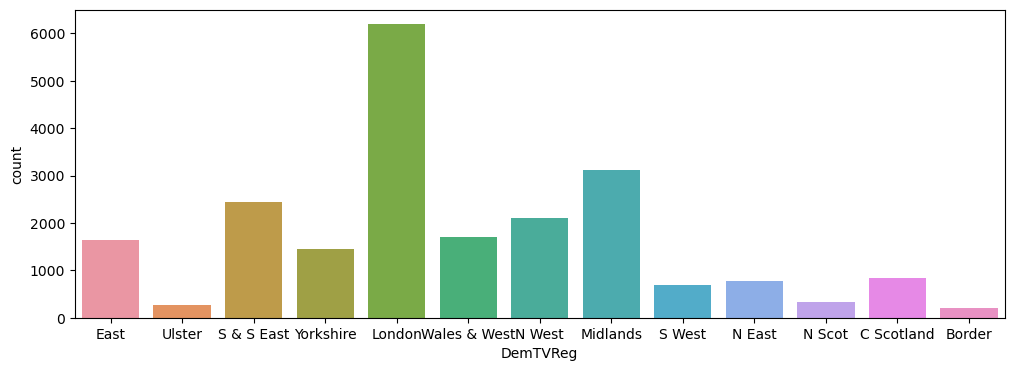

Column Name: LoyalClass


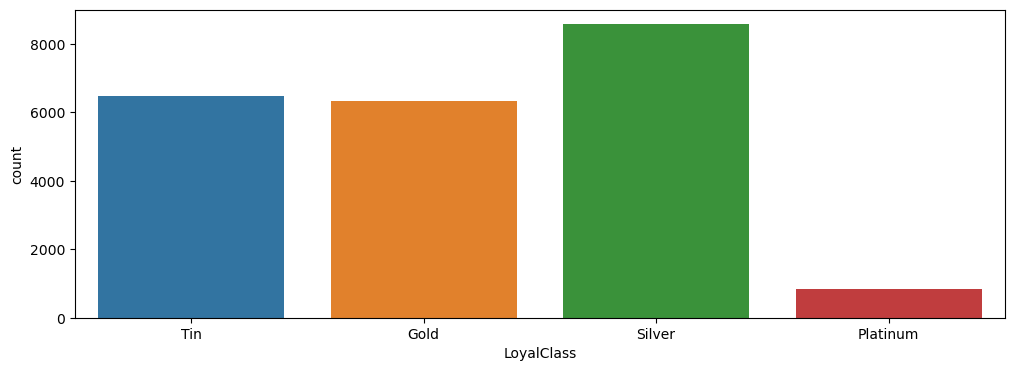

In [359]:
for i in df_o.columns:
    plt.figure(figsize=(12,4))
    print(f"Column Name: {i}")
    sns.countplot(df_o[i])
    plt.show()
    

In [360]:
# Demcluster group: Cluster U has the least leads
#DemGender= Females are the maximum in lead sample
#DemReg=South East contributes more and South East contributes less in Leads sample
#DemTvReg=London contributes maximum in the column, then 
# Loyal Class: highest no of leads in silver class and leat no of leads in Platinum class



In [361]:
# mutivariate Analysis

cross_tab = pd.crosstab(df["DemClusterGroup"],df["DemAge"],margins=True)
cross_tab

DemAge,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,All
DemClusterGroup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0,2,2,3,3,3,2,5,1,5,1,5,5,7,10,9,13,17,15,28,12,15,21,22,37,22,30,28,39,45,36,31,41,50,42,52,48,47,30,49,63,43,40,51,48,52,44,49,40,46,47,49,32,43,29,39,31,32,36,34,26,18,1725
B,1,1,3,0,3,2,2,4,7,8,10,17,19,22,22,28,28,38,41,56,38,41,58,52,47,61,65,61,57,94,75,84,119,111,115,103,95,111,93,92,101,106,118,108,94,110,115,107,114,103,107,91,97,86,68,76,78,58,83,71,50,38,3863
C,3,3,1,1,4,6,1,7,7,11,21,25,33,34,44,58,58,74,70,81,73,66,63,89,71,79,99,111,101,103,117,106,123,121,119,113,104,100,93,97,90,111,100,90,97,93,85,110,104,83,94,80,82,74,71,55,74,54,61,51,45,34,4228
D,0,2,2,0,3,6,6,8,8,15,17,26,35,36,43,63,52,81,56,78,73,89,79,90,90,98,101,94,110,108,110,106,125,122,107,121,111,99,100,90,93,97,111,104,92,102,90,84,83,88,66,52,63,63,66,54,55,47,43,42,31,21,4107
E,0,0,0,2,2,0,0,10,6,8,18,15,18,31,27,40,46,33,50,47,44,46,53,42,41,60,46,49,50,58,68,62,72,59,59,51,64,56,55,55,61,58,73,49,48,64,52,38,49,54,57,50,43,38,38,39,39,29,38,34,16,21,2431
F,0,2,2,2,3,5,8,9,15,25,31,31,50,73,81,81,73,91,80,103,87,74,92,88,80,95,93,91,94,97,108,111,84,127,84,82,77,79,70,69,63,77,73,69,75,72,63,72,64,56,43,51,52,41,37,46,43,39,34,33,25,16,3691
U,0,0,0,0,0,0,0,0,1,3,2,0,1,1,1,2,2,1,2,2,0,1,0,0,1,0,1,0,0,1,0,2,2,2,2,0,4,0,1,2,2,1,0,1,0,0,1,1,0,0,0,1,0,0,2,1,0,0,2,1,0,0,50
All,4,10,10,8,18,22,19,43,45,75,100,119,161,204,228,281,272,335,314,395,327,332,366,383,367,415,435,434,451,506,514,502,566,592,528,522,503,492,442,454,473,493,515,472,454,493,450,461,454,430,414,374,369,345,311,310,320,259,297,266,193,148,20095


In [362]:
#So  age bracket of 47-51 people are more most intrested people in buying the products as in the leads moew than 5% people belong to this group.
# age bracket 18-30 are least intrested inbuying the products. 

In [363]:
cross_tab = pd.crosstab(df["DemClusterGroup"],df["DemGender"],margins=True)
cross_tab

DemGender,F,M,U,All
DemClusterGroup,,,,
A,952,488,165,1605
B,2233,1097,329,3659
C,2486,1206,358,4050
D,2400,1142,342,3884
E,1406,712,214,2332
F,2240,990,290,3520
U,35,13,1,49
All,11752,5648,1699,19099


In [364]:
cross_tab = pd.crosstab(df["DemClusterGroup"],df["DemReg"],margins=True)
cross_tab

DemReg,Midlands,North,Scottish,South East,South West,All
DemClusterGroup,,,,,,
A,272,312,144,1085,14,1827
B,980,743,262,1903,178,4066
C,1357,859,253,1897,101,4467
D,1399,950,240,1569,123,4281
E,867,484,136,945,117,2549
F,1446,893,301,1072,145,3857
U,17,9,0,25,1,52
All,6338,4250,1336,8496,679,21099


In [365]:
#Midlands people are mostly in C,D,F cluster
#North people prefer C,D,F cluster
# SCottish people mostly are in b,C,D,F cluster
#South East people mostly are in B,C,D cluster
#SouthWest people mostly are in B,F
# So overall Most of the leads lie in B,C,D,F cluster

In [366]:
cross_tab = pd.crosstab(df["DemClusterGroup"],df["LoyalSpend"],margins=True)
cross_tab

LoyalSpend       0.009999999999999998  0.019999999999999997  \
DemClusterGroup                                               
A                                 334                     9   
B                                 842                    28   
C                                1258                    36   
D                                1451                    44   
E                                 839                    31   
F                                1539                    46   
U                                  18                     0   
All                              6281                   194   

LoyalSpend       0.029999999999999995  0.09999999999999999  \
DemClusterGroup                                              
A                                   0                    0   
B                                   0                    0   
C                                   2                    1   
D                                   1                    0   
E                                   0                    0   
F                                   1                    1   
U                                   1                    0   
All                                 5                    2   

LoyalSpend       0.10999999999999999  1.5399999999999998  2.2399999999999998  \
DemClusterGroup                                                                
A                                  0                   0                   0   
B                                  1                   0                   1   
C                                  0                   0                   0   
D                                  0                   2                   0   
E                                  0                   0                   0   
F                                  0                   0                   0   
U                                  0                   0                   0   
All                                1                   2                   1   

LoyalSpend       2.6599999999999997  2.9499999999999997  3.32  3.34  \
DemClusterGroup                                                       
A                                 0                   0     0     0   
B                                 1                   1     0     1   
C                                 0                   0     0     0   
D                                 0                   0     0     0   
E                                 0                   0     0     0   
F                                 0                   0     1     0   
U                                 0                   0     0     0   
All                               1                   1     1     1   

LoyalSpend       3.8699999999999997  4.8  5.0  6.97  9.709999999999999  10.0  \
DemClusterGroup                                                                
A                                 0    1    0     0                  0     0   
B                                 0    0    0     0                  0     2   
C                                 0    0    1     0                  0     0   
D                                 0    0    1     0                  1     2   
E                                 1    0    0     0                  0     0   
F                                 0    0    0     1                  0     0   
U                                 0    0    0     0                  0     0   
All                               1    1    2     1                  1     4   

LoyalSpend       10.01  10.2  10.87  12.0  12.29  12.5  13.77  15.0  18.83  \
DemClusterGroup                                                              
A                    0     0      0     0      0     0      0     0      0   
B                    0     0      0     0      0     0      0     1      0   
C                    0     0      0     0      1     0      0     0      1   
D                    0     0      0     0    

<AxesSubplot:xlabel='LoyalSpend', ylabel='DemAge'>

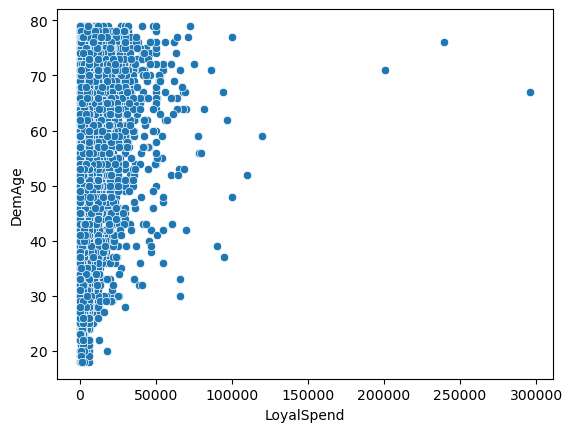

In [367]:
sns.scatterplot(y=df["DemAge"],x=df["LoyalSpend"])

In [368]:
# this graph also shows that age above 30 are the real buyers and maximum distribution of customers are above age 50

In [369]:
# Data preprocessing
# Finding the null values
df.isnull().sum()

ID                    0
DemAffl            1085
DemAge             1508
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
LoyalClass            0
LoyalSpend            0
LoyalTime           281
TargetBuy             0
dtype: int64

In [370]:
# Data Imputation

In [371]:
for i in df.columns:
    if df[i].isna().any():
        if df[i].dtype == "float":
            df[i] = df[i].fillna(df[i].median())
        elif df[i].dtype == "object":
            df[i] = df[i].fillna(df[i].mode().values[0])

         
        
        

In [372]:
df

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,54.0,C,F,South East,London,Tin,0.01,5.0,0
1,8415498,15.0,54.0,C,M,South East,London,Gold,8000.00,5.0,1
2,12107603,8.0,54.0,C,M,Midlands,East,Tin,0.01,5.0,1
3,14400995,8.0,28.0,C,F,South East,London,Tin,0.01,5.0,1
4,28724674,14.0,67.0,C,F,South East,London,Tin,0.01,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...
22218,52830893,13.0,49.0,B,M,South East,London,Silver,500.00,9.0,0
22219,52834058,13.0,65.0,B,F,South East,London,Silver,1500.00,5.0,0
22220,52834376,15.0,73.0,D,U,South East,S & S East,Gold,6053.06,12.0,0
22221,52837057,9.0,70.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0


In [373]:
# Label Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [374]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])
        

In [375]:
df.ID.nunique()

22223

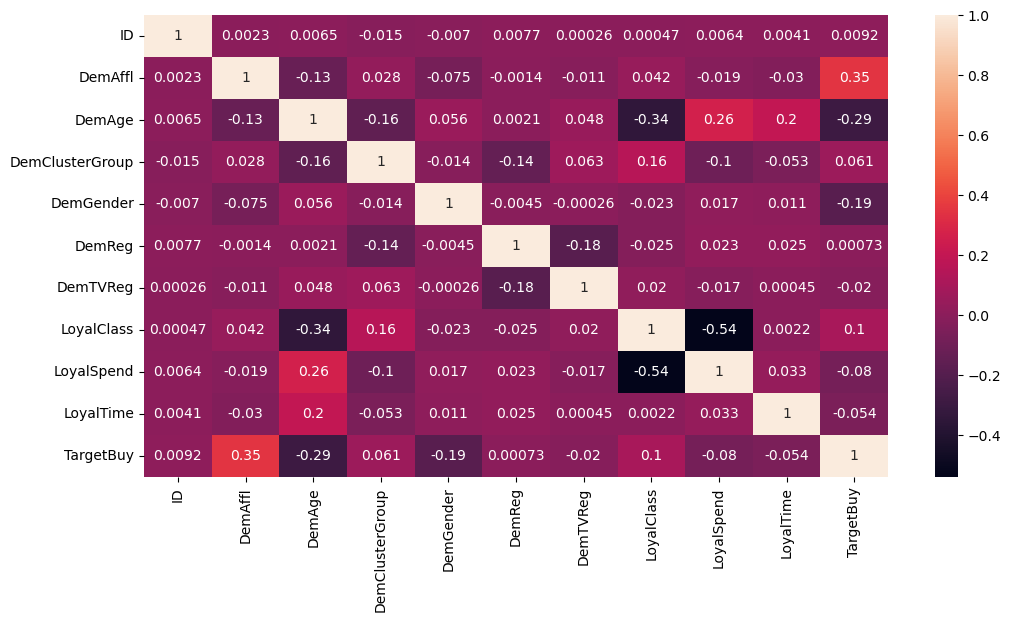

In [376]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [377]:
# Loyalty class and LoyalitySpend has high correlation
###Checking for Multicollinearity

In [378]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df1):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df1.columns
    vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

    return(vif)

In [379]:
df1 = df.iloc[:,0:9]
calc_vif(df1)

,variables,VIF
0,ID,3.768275
1,DemAffl,6.376689
2,DemAge,10.152391
3,DemClusterGroup,3.673972
4,DemGender,1.436019
5,DemReg,2.484203
6,DemTVReg,3.765026
7,LoyalClass,3.857382
8,LoyalSpend,1.865601


In [380]:
X=df.drop(["TargetBuy","ID"],axis=1)
Y=df.TargetBuy

In [381]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
y_test

17281    0
18664    0
8152     0
5333     0
3302     0
        ..
4148     0
9122     0
8457     0
13458    0
4926     0
Name: TargetBuy, Length: 4445, dtype: int64

Model Training

In [382]:
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [383]:
print(confusion_matrix(y_test,y_pred))

[[3197  170]
 [ 678  400]]


In [384]:
print(accuracy_score(y_test, y_pred))

0.8092238470191226


In [385]:
predictions = classifier.predict_proba(X_test)
predictions

array([[0.84627895, 0.15372105],
       [0.65484459, 0.34515541],
       [0.40431618, 0.59568382],
       ...,
       [0.81672805, 0.18327195],
       [0.89733788, 0.10266212],
       [0.92093676, 0.07906324]])

In [386]:
# Exporting Logistic Regression Classifier to later use in prediction
import joblib
joblib.dump(classifier0, './c2_Classifier_LoyalCustomers')

['./c2_Classifier_LoyalCustomers']

In [387]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
#
#df_x_test = pd.DataFrame(X_test)

#
#



In [388]:
df_prediction_prob

,prob_0,prob_1
0,0.846279,0.153721
1,0.654845,0.345155
2,0.404316,0.595684
3,0.934042,0.065958
4,0.716538,0.283462
...,...,...
4440,0.824676,0.175324
4441,0.951132,0.048868
4442,0.816728,0.183272
4443,0.897338,0.102662


In [389]:
df_test_dataset=pd.DataFrame()

In [390]:
df_test_dataset= pd.DataFrame(y_test.values,columns= ['Actual Outcome'])

In [391]:
df_test_dataset

,Actual Outcome
0,0
1,0
2,0
3,0
4,0
...,...
4440,0
4441,0
4442,0
4443,0


In [392]:
df_x_test = pd.DataFrame(X_test)
df_x_test=df_x_test.reset_index()

In [393]:
dfx=pd.concat([df_x_test,df_test_dataset, df_prediction_prob], axis=1)
dfx.drop("index",axis=1,inplace=True)

In [394]:
dfx.to_excel("c1_ModelOutput_10Percent.xlsx")